In [31]:
from io import BytesIO
import base64
from PIL import Image, ImageDraw

In [20]:
DET_PATH = "pretrain_data_examples/detection_examples.tsv"

In [21]:
offset = 0
fp = open(DET_PATH, "r")
lineid_to_offset = []
for line in fp:
    lineid_to_offset.append(offset)
    offset += len(line.encode('utf-8'))

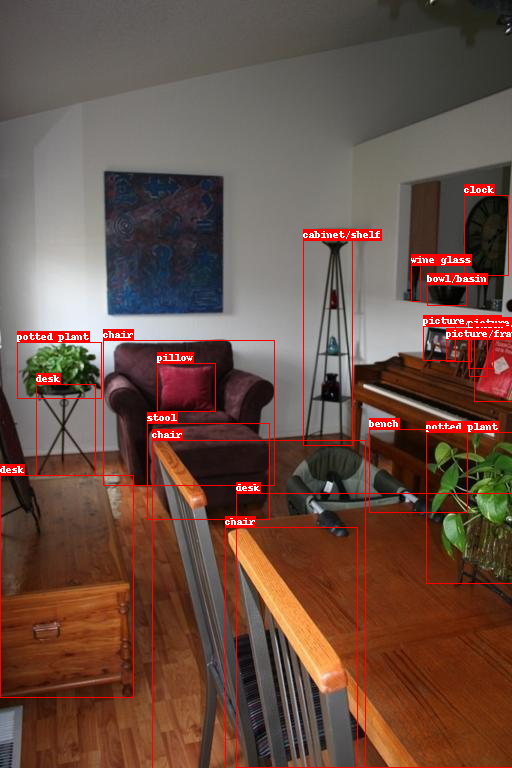

In [71]:
fp.seek(lineid_to_offset[12])
image_id, image, label = fp.readline().rstrip("\n").split("\t")
image = Image.open(BytesIO(base64.urlsafe_b64decode(image))).convert("RGB")
draw = ImageDraw.Draw(image)
w, h = image.size

boxes_target = {"boxes": [], "labels": [], "area": [], "size": [h, w]}
label_list = label.strip().split('&&')
for label in label_list:
    x0, y0, x1, y1, cat_id, cat = label.strip().split(',', 5)
    x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
    boxes_target["boxes"].append([x0, y0, x1, y1])
    boxes_target["labels"].append(cat)
    boxes_target["area"].append((x0, y0, x1, y1))
    
    draw.rectangle((x0, y0, x1, y1), outline="red")
    # text_width, text_height = draw.textsize(cat)
    bbox = draw.textbbox((x0, y0), cat)
    draw.rectangle((bbox[0], bbox[1]-bbox[3]+bbox[1], bbox[2], bbox[1]), fill="red")
    draw.text((x0, y0-bbox[3]+bbox[1]), cat, fill="white")
# print(boxes_target)
display(image)